In [5]:
import tweepy
import json
import pandas as pd
import numpy as np
import time
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from config import (consumer_key, consumer_secret, 
                    access_token, access_token_secret)

In [6]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [8]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [9]:
#Get tweets from each news organization's twitter feeds.

# A list to hold sentiments.

sentiments = []

target_users = ("@BBC", "@CBS", "@CNN", "@FoxNews", "@NYTimes")

#Loop though target users.

for user in target_users:
    
    #Counter 

    counter = 0
    
    #Loop through 5 pages of tweets for each news organization.


    #Get all tweets from the homefeed of each news organization.

    public_tweets = api.user_timeline(user, count = 100)

        #Loop through all tweets.

    for tweet in public_tweets:

        #Run the Vader analysis on each tweet.

        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = counter
        tweet_text = tweet["text"]

        #Add sentiments for each tweet to the sentiments list.

        sentiments.append({"User" : user,
                           "Date": tweet["created_at"],
                           "Compound" : compound,
                           "Positive" : pos,
                           "Negative" : neg,
                           "Neutral" : neu,
                           "Tweets Ago" : counter,
                           "Tweet Text" : tweet_text})
        #Add to counter.

        counter = counter + 1

In [10]:
news_sentiments = pd.DataFrame.from_dict(sentiments)
news_sentiments

,Compound,Date,Negative,Neutral,Positive,Tweet Text,Tweets Ago,User
0,-0.3612,Thu Jun 07 19:04:09 +0000 2018,0.143,0.857,0.000,#OurGirl's Michelle Keegan discovers her great...,0,@BBC
1,0.0000,Thu Jun 07 18:00:21 +0000 2018,0.000,1.000,0.000,❤️️ Harry has been wearing a Spider-Man mask d...,1,@BBC
2,0.7964,Thu Jun 07 16:02:03 +0000 2018,0.000,0.530,0.470,Turns out even Shakespearean acting legends lo...,2,@BBC
3,0.4404,Thu Jun 07 15:36:48 +0000 2018,0.000,0.884,0.116,RT @BBC6Music: 💪 Who do you hope to hear durin...,3,@BBC
4,0.8043,Thu Jun 07 15:32:24 +0000 2018,0.086,0.544,0.369,This elderly man was struggling slowly across ...,4,@BBC
5,-0.7906,Thu Jun 07 14:04:02 +0000 2018,0.269,0.731,0.000,🐍 A Texan required 26 doses of anti-venom afte...,5,@BBC
6,-0.4588,Thu Jun 07 13:00:43 +0000 2018,0.138,0.862,0.000,RT @BBC_ARoadshow: 'We did it for all women' -...,6,@BBC
7,0.2263,Thu Jun 07 13:00:26 +0000 2018,0.000,0.921,0.079,🎞🎬 From the Jurassic World sequel to an Oscar ...,7,@BBC
8,-0.5574,Thu Jun 07 12:01:05 +0000 2018,0.242,0.659,0.099,"👊💕 If you've ever been touched by cancer, Juli...",8,@BBC
9,0.6531,Thu Jun 07 11:46:22 +0000 2018,0.057,0.706,0.237,RT @BBCEarth: Are you obsessed with the ocean?...,9,@BBC


In [11]:
news_sentiments.to_csv("Twitter_News_Mood.csv", index=False)

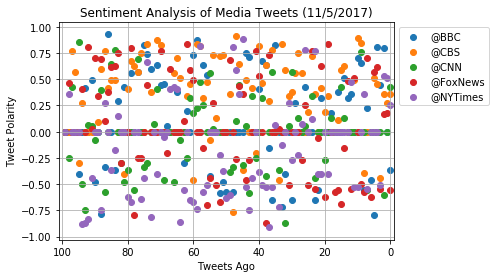

In [12]:
plt.xlim(101, -1)

#plot scatterplot using a for loop.
for user in target_users:
    dataframe = news_sentiments.loc[news_sentiments["User"] == user]
    plt.scatter(dataframe["Tweets Ago"],dataframe["Compound"],label = user)
    
#Add legend
plt.legend(bbox_to_anchor = (1,1))

#Add title, x axis label, and y axis label.
plt.title("Sentiment Analysis of Media Tweets (11/5/2017)")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")

#Set a grid on the plot.
plt.grid()

plt.savefig("Sentiment Analysis of Media Tweets")
plt.show()

In [13]:
average_sentiment = news_sentiments.groupby("User")["Compound"].mean()
average_sentiment

User
@BBC        0.099469
@CBS        0.314271
@CNN        0.001074
@FoxNews    0.060668
@NYTimes   -0.132334
Name: Compound, dtype: float64

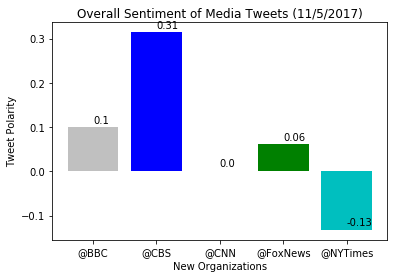

In [14]:
x_axis = np.arange(len(average_sentiment))
xlabels = average_sentiment.index
count = 0
for sentiment in average_sentiment:
    plt.text(count, sentiment+.01, str(round(sentiment,2)))
    count = count + 1
plt.bar(x_axis, average_sentiment, tick_label = xlabels, color = ['silver', 'b', 'y', 'g', 'c'])
#Set title, x axis label, and y axis label.
plt.title("Overall Sentiment of Media Tweets (11/5/2017)")
plt.xlabel("New Organizations")
plt.ylabel("Tweet Polarity")
plt.savefig("Overall Sentiment of Media Tweets")
plt.show()

In [ ]:
Observation 1:
The New York Times was the only news source to have negative sentiment

Observation 2:
CNN had Neutral sentiment. this was suprising to me because it would seem to me that they would get more negative sentiment by conservatives.

Observation 3:
CBS had the most positive sentiment of the news sources listed.